In [1]:
import numpy as np
from numba.typed import List as NumbaList
from BPmodule.BPGen  import PROBLEM2,PROBLEM3,PROBLEM4,PROBLEM5,PROBLEM1
from BPnumba.GeneticOperators import CreateHeuristicPob,InstancePob,CrossOX,Hamming,InverseMutation
from BPnumba.DFFA import createDFFA,createEDFFA
import matplotlib.pyplot as plt

In [2]:
P1A1 = PROBLEM1[0]
P2A1 = PROBLEM2[0]
P2A2 = PROBLEM2[1]
P3A1 = PROBLEM3[0]
P3A2 = PROBLEM3[1]
P4A1 = PROBLEM4[0]
P4A2 = PROBLEM4[1]
P5A1 = PROBLEM5[0]
P5A2 = PROBLEM5[1]
contenedor =P3A2[0][0]
datos = P3A2[1]
n= len(datos)
n

52

In [44]:
pop= 50
initial = CreateHeuristicPob(pop,datos,True)
gamma= 1/n
maxItr=500

In [45]:
Pob = InstancePob(NumbaList(initial),datos,contenedor)

In [46]:
edffa = createEDFFA(gamma)

In [47]:
dffa = createDFFA(gamma)

In [48]:
edffa.Train(maxItr,NumbaList(Pob.copy()),datos,contenedor)

In [49]:
edffa.BestInd.fi,edffa.BestInd.codeSolution

(0.999721,
 '|2|52|1|49|17|29|3|51|21|50|28|22|20|16|19|18|11|43|41|42|25|44|13|6|10|27|15|30|26|40|8|31|4|12|38|7|9|39|45|36|37|48|5|47|14|46|32|')

In [50]:
dffa.Train(maxItr,NumbaList(Pob.copy()),datos,contenedor)

In [51]:
dffa.BestInd.fi,dffa.BestInd.codeSolution

(0.999721,
 '|2|52|1|49|17|29|3|51|21|50|28|22|20|16|19|18|11|43|41|42|25|44|13|6|10|27|15|30|26|40|8|31|4|12|38|7|9|39|45|36|37|48|5|47|14|46|32|')

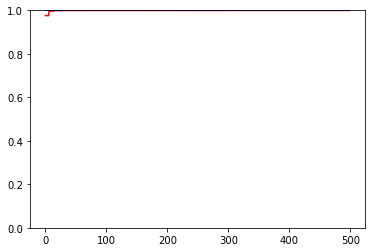

In [52]:
plt.figure()
plt.plot(edffa.bestfi,color='red')
plt.plot(dffa.bestfi,color='blue')
plt.ylim(0,1)
plt.show()

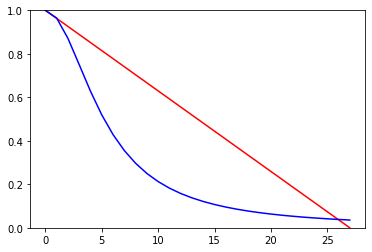

In [56]:
n=27
gamma = 1/n
plt.figure()
x=np.arange(n+1)
similarity = lambda x: 1-(x/n)
betta = lambda x :1/(1+gamma*((x)**2))
plt.plot(x,similarity(x),color='red')
plt.plot(x,betta(x),color='blue')
plt.ylim(0,1)
plt.show()